In [ ]:
import random

def quicksort_random_pivot(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    lesser = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort_random_pivot(lesser) + equal + quicksort_random_pivot(greater)


In [ ]:
def quicksort_non_random_pivot(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    lesser = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort_non_random_pivot(lesser) + equal + quicksort_non_random_pivot(greater)


In [21]:
# @title Default title text
import timeit

def benchmark_sorting_algorithm(sort_function, input_data):
    return timeit.timeit(lambda: sort_function(input_data.copy()), number=1000)

# Example usage:
array_sizes = [10, 50, 100, 500, 1000,10000] # Add more sizes as needed

for size in array_sizes:
    best_case_data = list(range(size))
    worst_case_data = list(range(size, 0, -1))
    average_case_data = random.sample(range(size * 10), size)

    best_case_time = benchmark_sorting_algorithm(quicksort_non_random_pivot, best_case_data)
    worst_case_time = benchmark_sorting_algorithm(quicksort_non_random_pivot, worst_case_data)
    average_case_time = benchmark_sorting_algorithm(quicksort_non_random_pivot, average_case_data)

    print(f"Array size: {size}")
    print(f"Best case time: {best_case_time:.6f} seconds")
    print(f"Worst case time: {worst_case_time:.6f} seconds")
    print(f"Average case time: {average_case_time:.6f} seconds\n")


Array size: 10
Best case time: 0.015325 seconds
Worst case time: 0.011184 seconds
Average case time: 0.012704 seconds

Array size: 50
Best case time: 0.072823 seconds
Worst case time: 0.068117 seconds
Average case time: 0.090374 seconds

Array size: 100
Best case time: 0.240823 seconds
Worst case time: 0.323352 seconds
Average case time: 0.319907 seconds

Array size: 500
Best case time: 1.619460 seconds
Worst case time: 0.916886 seconds
Average case time: 1.214686 seconds

Array size: 1000
Best case time: 1.875445 seconds
Worst case time: 1.789748 seconds
Average case time: 2.679833 seconds

Array size: 10000
Best case time: 35.191994 seconds
Worst case time: 26.010870 seconds
Average case time: 37.936974 seconds



In [ ]:
import random

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def quicksort_random_pivot(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort_random_pivot(left) + middle + quicksort_random_pivot(right)


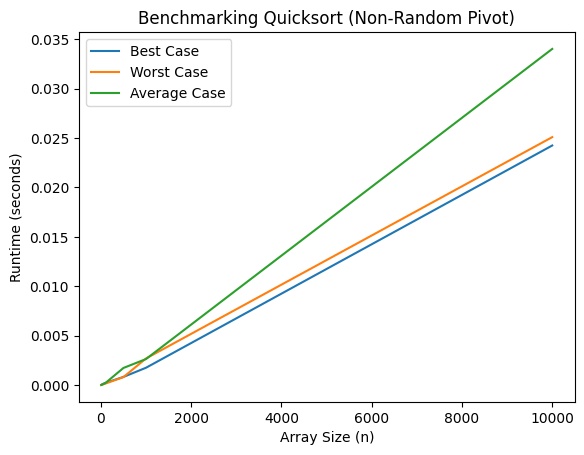

In [22]:
import timeit
import matplotlib.pyplot as plt

def generate_best_case(n):
    return list(range(n))

def generate_worst_case(n):
    return list(range(n, 0, -1))

def generate_average_case(n):
    return random.sample(range(n), n)

def benchmark_quicksort(func, input_generator, sizes):
    runtimes = []

    for size in sizes:
        input_data = input_generator(size)
        runtime = timeit.timeit(lambda: func(input_data), number=10) / 10  # 10 repetitions and average
        runtimes.append(runtime)

    return runtimes

sizes = [10, 50, 100, 500, 1000,10000]
best_case_runtimes = benchmark_quicksort(quicksort, generate_best_case, sizes)
worst_case_runtimes = benchmark_quicksort(quicksort, generate_worst_case, sizes)
average_case_runtimes = benchmark_quicksort(quicksort, generate_average_case, sizes)

# Plotting
plt.plot(sizes, best_case_runtimes, label='Best Case')
plt.plot(sizes, worst_case_runtimes, label='Worst Case')
plt.plot(sizes, average_case_runtimes, label='Average Case')

plt.xlabel('Array Size (n)')
plt.ylabel('Runtime (seconds)')
plt.title('Benchmarking Quicksort (Non-Random Pivot)')
plt.legend()
plt.show()
